# DATA WRANGLING

In [65]:
import pandas as pd
import seaborn as sns
import os
from math import log
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
import pickle
from sklearn import __version__ as sklearn_version
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector

from sklearn import preprocessing

from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix, auc, roc_curve, recall_score, classification_report

import statsmodels.api as sm
import plotly.express as px
from statsmodels.formula.api import ols
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.metrics import precision_score, precision_recall_curve
from sklearn.naive_bayes import GaussianNB
from termcolor import colored as cl # text customization
import seaborn as sb # visualization

from sklearn.preprocessing import StandardScaler, PowerTransformer, PolynomialFeatures, OneHotEncoder

from sklearn.model_selection import train_test_split # data split

from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet # ElasticNet algorithm

from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 # evaluation metric

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.over_sampling import RandomOverSampler, SMOTE, SMOTENC


plt.rcParams['figure.figsize'] = (20, 10) # plot size

sns.set(style='ticks')
sb.set_style('whitegrid') # plot style
plt.rcParams['figure.figsize'] = (20, 10) # plot size



In [6]:
takehome_users_engagement = pd.read_csv('takehome_user_engagement.csv')

In [7]:
takehome_users_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [17]:
takehome_users_engagement.tail()

,time_stamp,user_id,visited
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1
207916,2014-01-26 08:57:12,12000,1


In [13]:
takehome_users = pd.read_csv('takehome_users.csv', encoding='latin-1')

In [15]:
takehome_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   name                        12000 non-null  object 
 3   email                       12000 non-null  object 
 4   creation_source             12000 non-null  object 
 5   last_session_creation_time  8823 non-null   float64
 6   opted_in_to_mailing_list    12000 non-null  int64  
 7   enabled_for_marketing_drip  12000 non-null  int64  
 8   org_id                      12000 non-null  int64  
 9   invited_by_user_id          6417 non-null   float64
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


In [16]:
takehome_users.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')

In [18]:
duplicates = takehome_users.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
11995    False
11996    False
11997    False
11998    False
11999    False
Length: 12000, dtype: bool


In [19]:
takehome_users_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   time_stamp  207917 non-null  object
 1   user_id     207917 non-null  int64 
 2   visited     207917 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.8+ MB


# EXPLORATORY DATA ANALYSIS

In [20]:
takehome_users.isnull().sum().sum()

8760

In [21]:
takehome_users_engagement.isnull().sum().sum()

0

There are 8760 missing values in the user data, but user engagement data does not have any missing values.

In [23]:
takehome_users_engagement['user_id'].unique()

array([    1,     2,     3, ..., 11998, 11999, 12000])

In [26]:
three_log = takehome_users_engagement.groupby('user_id').filter(lambda x: len(x) >=3)
print('There are {} unique users who logged in 3 times or more in total'\
      .format(len(three_log['user_id'].unique())))

There are 2248 unique users who logged in 3 times or more in total


In [27]:
three_log.head()

,time_stamp,user_id,visited
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
5,2013-12-31 03:45:04,2,1


In [49]:
adopted = 0
adopted_users = []
for i in range(len(three_log)-2):
    users = three_log['user_id'].iloc[i]
    if users != adopted and users == three_log['user_id'].iloc[i+2]:
        start_date = pd.Timestamp(three_log['time_stamp'].iloc[i])
        end_date = start_date + pd.Timedelta('7D')
        if start_date < pd.Timestamp(three_log['time_stamp'].iloc[i+1]) < end_date and start_date < \
        pd.Timestamp(three_log['time_stamp'].iloc[i+2]) < end_date:
            adopted_users.append(users)
            adopted = users
            
len(adopted_users)

1602

In [61]:
y = pd.Series(np.random.randn(len(takehome_users)))
n = 0
for i in range(len(takehome_users)):
    if takehome_users['object_id'][i] == adopted_users[n]:
        y[i] = 1
        n = n+1
        if n > len(adopted_users)-1:
            n = n -1
    else:
        y[i] = 0
        
users = pd.DataFrame(y, columns = ['adopted_users'])
data = pd.concat([takehome_users, users], axis=1)
print((data[data['adopted_users'] == 1]).count())



invited_user = pd.Series(np.random.randn(len(data)))
for i in range(len(data)):
    if data['invited_by_user_id'][i] >=1:
        invited_user[i] = 1
    else:
        invited_user[i] = 0
data_ = pd.DataFrame(invited_user, columns = ['invited'])
_data_ = pd.concat([data,data_], axis = 1)

data.head()

object_id                     1602
creation_time                 1602
name                          1602
email                         1602
creation_source               1602
last_session_creation_time    1602
opted_in_to_mailing_list      1602
enabled_for_marketing_drip    1602
org_id                        1602
invited_by_user_id             913
adopted_users                 1602
dtype: int64


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [59]:
data_.head()

,invited
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


In [63]:
_data_.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users,invited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,1.0


# PRE-PROCESSING

In [69]:
y = data['adopted_users']
X = data[['creation','last_session_creation_time','opted_in_to_mailing_list','enabled_for_marketing_drip','org_id']]

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [73]:
print(X.shape)
print(y.shape)

(12000, 5)
(12000,)


In [74]:
print(X_train.shape)
print(X_test.shape)

(8040, 5)
(3960, 5)


# MODELING

In [75]:
encoder = preprocessing.LabelEncoder()
encoder.fit(['ORG_INVITE','GUEST_INVITE','PERSONAL_PROJECTS','SIGNUP','SIGNUP_GOOGLE_AUTH'])

LabelEncoder()

In [76]:
df = encoder.transform(data['creation_source'])
data_data = pd.DataFrame(df, columns = ['creation'])
data = pd.concat([_data_ , data_data], axis=1)
data.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_users,invited,creation
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,1.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,1.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,1.0,1
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,1.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,1.0,0


### XGBoost

In [77]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

/Users/dambrielf67/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:12:32] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

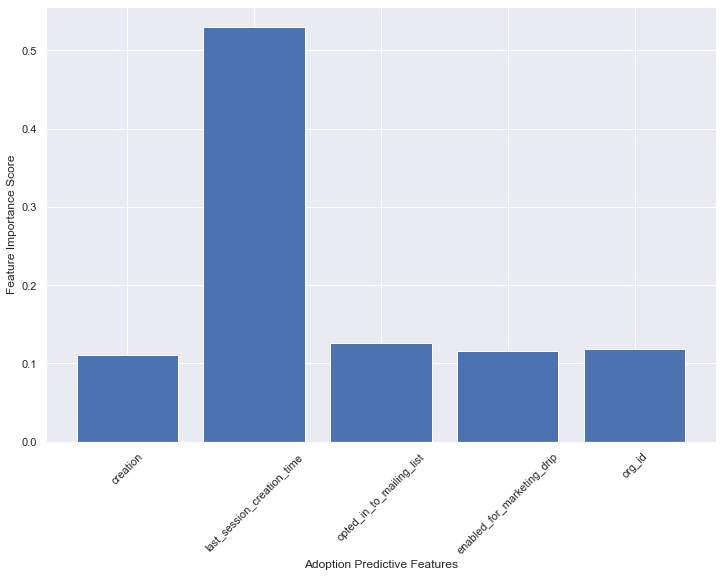

In [81]:
feat_imp = xgb.feature_importances_
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
plt.bar(range(len(xgb.feature_importances_)), xgb.feature_importances_)
X_col = X.columns
plt.xlabel('Adoption Predictive Features')
plt.ylabel('Feature Importance Score')
plt.xticks(range(len(X_col)), X_col.values, rotation=45)
plt.show()

In [83]:
y_pred = xgb.predict(X_test)
prediction = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.26%


### LightGBM

In [78]:
lgbm = lgb.LGBMClassifier().fit(X_train, y_train)

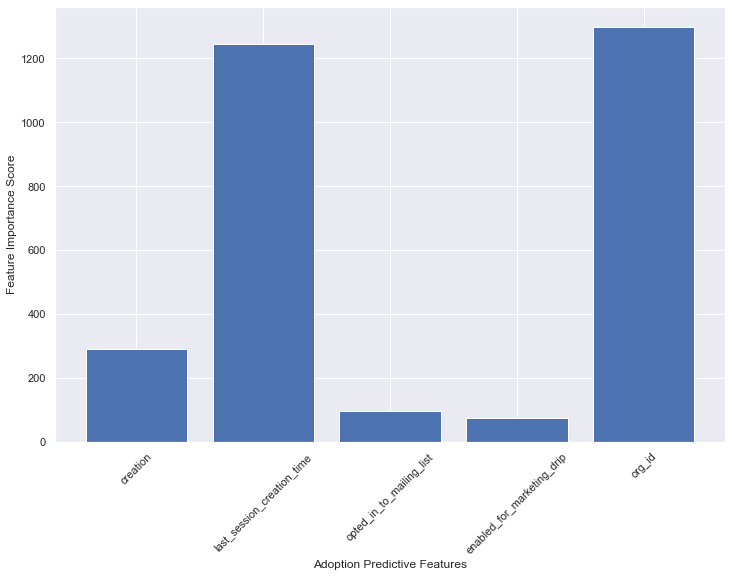

In [84]:
feat_imp = lgbm.feature_importances_
sns.set_style("darkgrid")
plt.figure(figsize=(12,8))
plt.bar(range(len(lgbm.feature_importances_)), lgbm.feature_importances_)
X_col = X.columns
plt.xlabel('Adoption Predictive Features')
plt.ylabel('Feature Importance Score')
plt.xticks(range(len(X_col)), X_col.values, rotation=45)
plt.show()

In [85]:
y_pred = lgbm.predict(X_test)
prediction = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, prediction)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 91.77%


Comparing the two models, XGBClassifier model has an accuracy of 91.26% in predicting whether a user will be an adopted user in the future, compared to LightGBM's 91.77%. After performing some feature importance, the XGBClassifier model predicts that the last login time and whether they have opted into receiving marketing emails are the two most important features for determining adoption, while LightGBM predicts last login time and user's organization as the two most important features for determining adoption.